##  Exploring Age, Gender, and Health Conditions as Predictors of Mortality in Heart Failure Patients

### Table of Contents
1. Project Overview 
    1.1. Introduction
        1.1.1. Problem Statement
    1.2. Objectives
2. Importing Packages
3. Loading Data
4. Data Cleaning
5. Exploratory Data Analysing 
6. Methodology 
7. Conclusion
8. References

### Project Overview

### Introduction

Cardiovascular diseases (CVDs) are the leading cause of death worldwide, with heart failure being a major contributor. Understanding the factors that influence mortality in heart failure patients—particularly age, gender, and pre-existing conditions like hypertension and diabetes—can help in identifying high-risk individuals and improving patient outcomes.

This project explores the relationships between demographic factors and health conditions in predicting mortality among heart failure patients. Using a dataset with 12 key variables from 299 patients, $we aim to develop a machine learning model that can assess mortality risk, providing insights that could support healthcare providers in early intervention and personalized treatment strategies$ (remove the sentence between the dollars sign)

### Problem statement 

Heart failure, a common outcome of cardiovascular disease, presents a significant mortality risk globally. Early identification of patients at high risk can support proactive healthcare and reduce mortality. This project explores the influence of age, gender, and coexisting health conditions on mortality in heart failure patients, aiming to provide actionable insights for improved patient management

### Objectives

1. To analyze how age and gender impact the prevalence of health conditions (e.g., diabetes, hypertension, anemia) in  heart failure patients.
2. To assess mortality risk across different demographic groups and health conditions.

### Importing Packages 

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings


warnings.filterwarnings("ignore")

### Loading data

In [71]:
import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv("C:\\Users\\lebog\\Documents\\unisa 2024\\STA4813\\archive (1)\\heart_failure_clinical_records_dataset.csv")
#df= pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


creatinine_phosphokinase - level of enzymes in the blood

ejection_fraction - Percentage of blood leaving the heart at each contraction 

platelets - platelets in the blood

serum_creatinine - Level of serum creatinine in the blood 

serum_sodium - level of sodium in the blood 

time - follow-up period(days)

Death event - If the patient deceased during the follow-up period (boolean), where 0 - Non-death and 1 Death

Anaemia - patients with anaemia represented by 1 and patients without anaemia represented by 0 

Diabetes - patients with diabetes represented by 1 and patients without diabetes represented by 0 

High blood pressure - patients with high blood pressure represented by 1 and patients without high blood pressure represented by 0 

Smoking - Non-smokers - 0 and Smokers - 1

Sex - 0 Males and 1 females 

In [100]:
df = df.drop('time', axis=1)

In [101]:
df.shape

(299, 12)

import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df .info()

### Data Cleaning 

In [102]:
# Round the ages to the nearest whole number
df['age'] = df['age'].round().astype(int)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [103]:
df['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

## Checking for null or empty entries in the data frame

In [104]:
# Check for null (NaN) values in each column
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64


In [105]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.836120,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


For anaemia, diabetes, high_blood_pressure, smoking, DEATH_EVENT, looking at the mean, we realised that the columns that yield binary result, they provide us with the probability of the event occuring. 

## unique values and their counts in the DEATH_EVENT column

In [106]:
print("Unique entries in the DEATH_EVENT column:")
print(df['DEATH_EVENT'].value_counts())
#show the number of death events, where 1 represents the death has occured and 0 represent not death has occurred, 
#looking if there is an extra or null entries

Unique entries in the DEATH_EVENT column:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [107]:
print("Unique entries in the anaemia column:")
print(df['anaemia'].value_counts())

Unique entries in the anaemia column:
anaemia
0    170
1    129
Name: count, dtype: int64


In [108]:
from scipy.stats import pearsonr
from lifelines import KaplanMeierFitter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Correlation analysis

In [109]:
print("\nCorrelation Matrix:")
df.corr()


Correlation Matrix:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088222,-0.081672,-0.100791,0.060049,0.093347,-0.052294,0.159161,-0.045992,0.065371,0.018539,0.253800
anaemia,0.088222,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081672,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.100791,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060049,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093347,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052294,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159161,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045992,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065371,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [110]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,1


# Univariate analysis

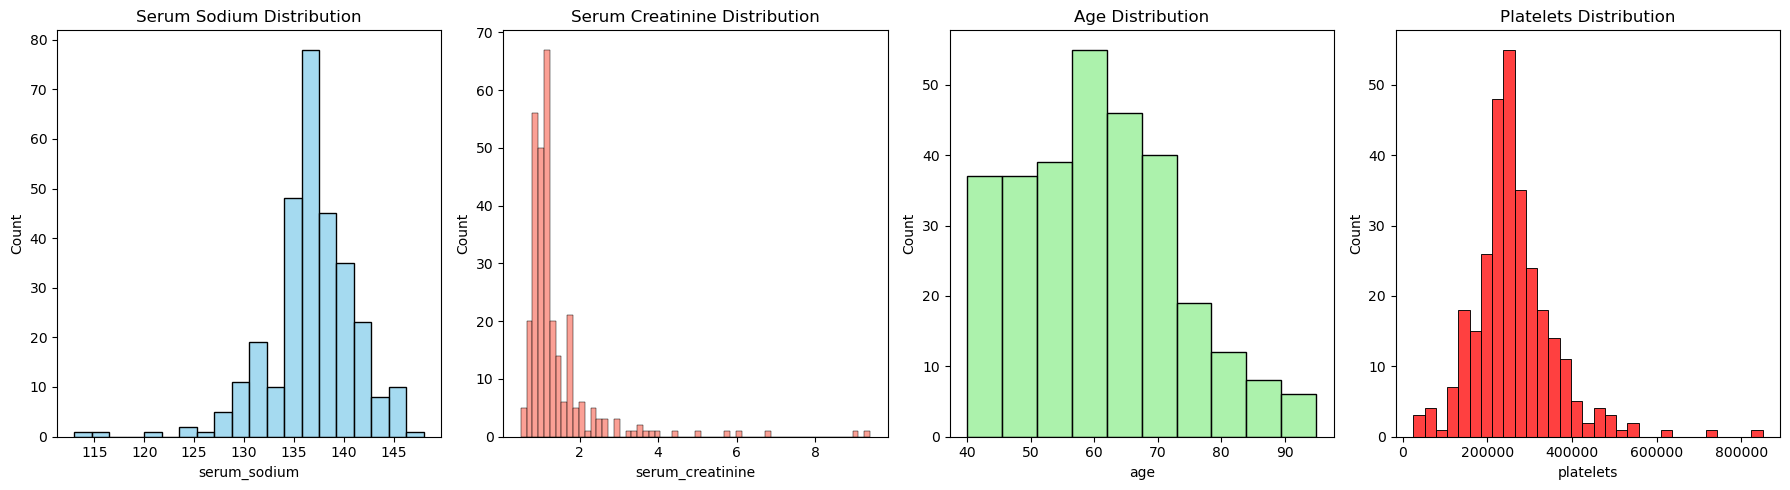

In [111]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Plot histograms on each subplot
sns.histplot(df['serum_sodium'], ax=axes[0], color="skyblue")
axes[0].set_title('Serum Sodium Distribution')

sns.histplot(df['serum_creatinine'], ax=axes[1], color="salmon")
axes[1].set_title('Serum Creatinine Distribution')

sns.histplot(df['age'], ax=axes[2], color="lightgreen")
axes[2].set_title('Age Distribution')

sns.histplot(df['platelets'], ax=axes[3], color="red")
axes[3].set_title('Platelets Distribution')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Showing the distribution for none are normally distributed
The serum sodium is right skewed, where most observations are in the range 135 to 140. The serum creatinine is left skewed, there is a right long tail, resulting in more possible outliers. The age is have more observations between 50 to 70, telling us the people between the ages 50 to 70 are at more risk to death, the death influenced by sickness like high blood pressure and diabetes. 
We further look at the relation between age and platelets. 

# Violin plot comparison of age by DEATH_EVENT

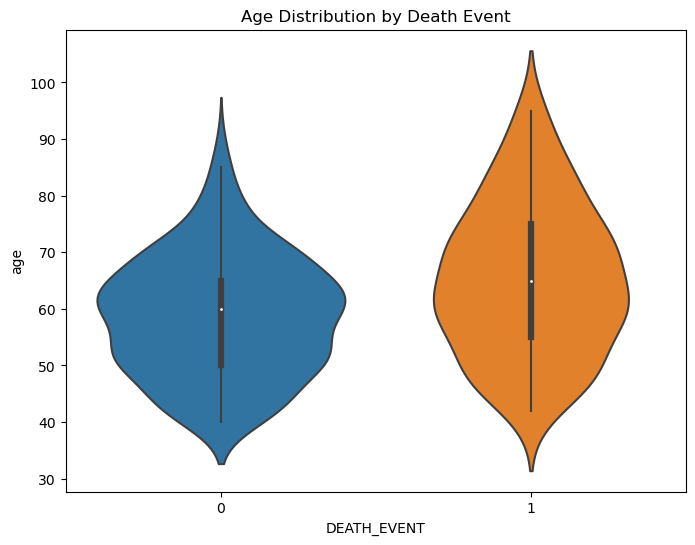

In [112]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age Distribution by Death Event')
plt.show()

We have discovered that 0 represents non-death and 1 represents death, looking at the violin plot, the mean of death is significantly higher than mean of the non-death, showing the average age of the patients die is between the ages of 60 to 80 that is similar to patients not dying. To verify the accurately of this plot, the maximum of of patient die is between 90 to 100, which is realistic. Further discussing the 75 percentile of patients dying is high. These results can be influenced by the various diseases attached to this dataset. 

## Visualize the correlation matrix

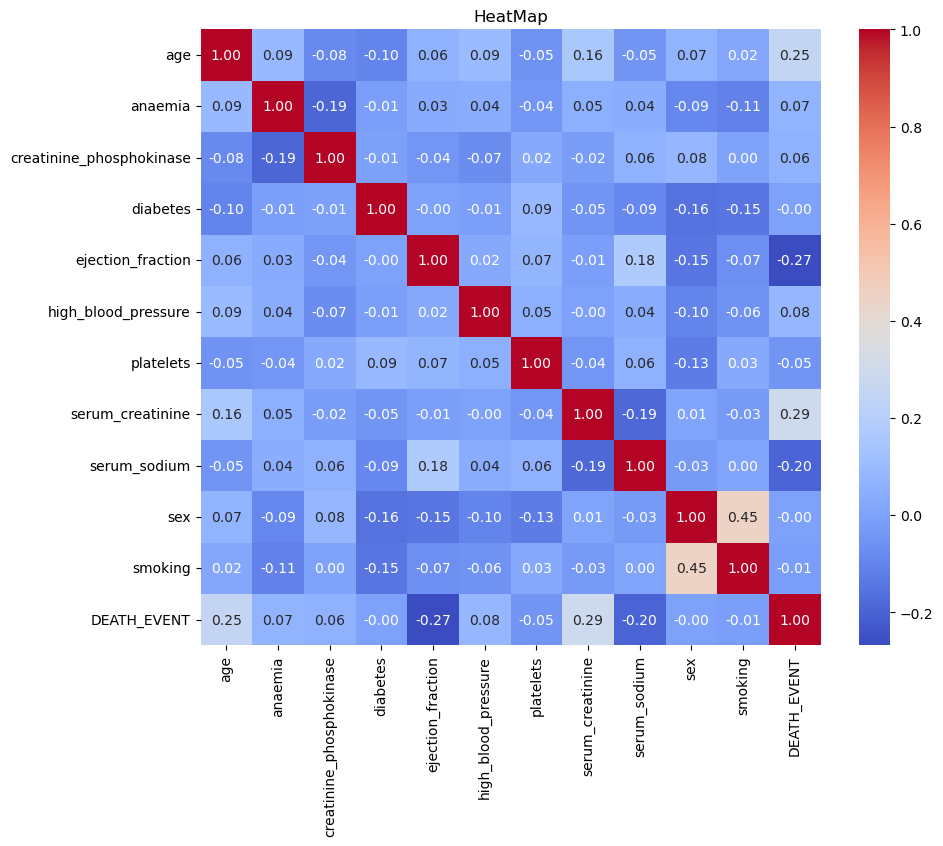

In [113]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('HeatMap')
plt.show()

In the heatmap, it represents the correlation matrix of the variables.
Features like high_blood_pressure, anaemia, creatinine_phosphokinase, diabetes, sex, smoking, and platelets do not display any kind of correlation with DEATH_EVENT. 

The feature time and death has a negative lower correlation of -0.53, explaining that as one increases, the other tends to decrease to a moderate extent.

From this result, this does not support our objective that diseases do not influence death  

Pariplot to see relationships between the variables

# Risk Factor Analysis with Multivariate Plot

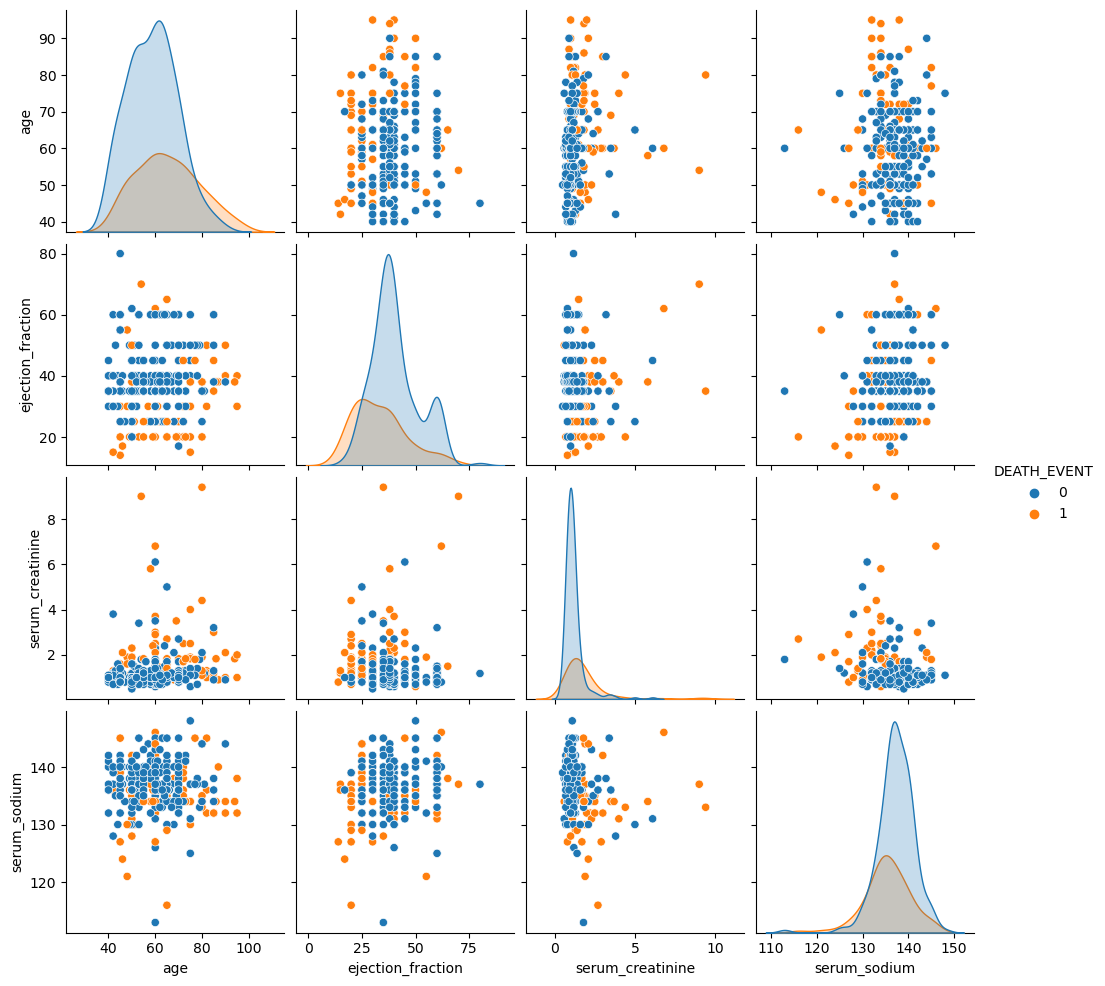

In [115]:
sns.pairplot(df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']], hue='DEATH_EVENT')
plt.show()


In the pairplot, we visualise the correlation matrix. We can see from pairplot, the scattorplots do not show a relation between variables, just as we saw in the heatmap, very low correlations. 

## Checking the countplot of binary variables 

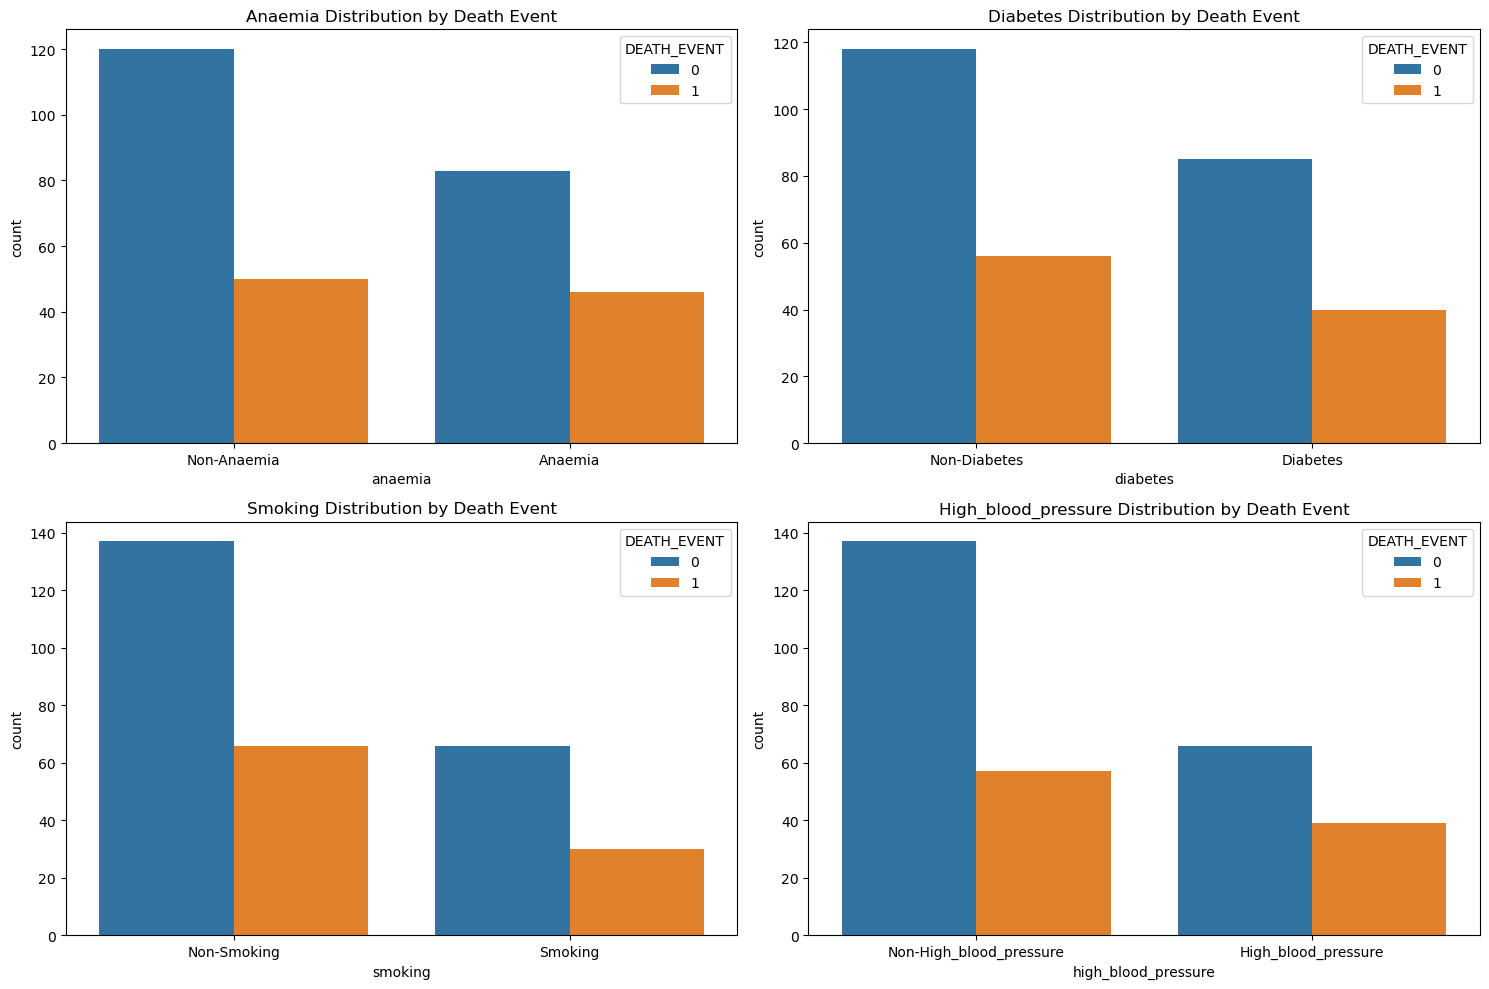

In [116]:
# Count plot for 'anaemia', 'diabetes', 'smoking', 'high_blood_pressure'
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical_vars = ['anaemia', 'diabetes', 'smoking', 'high_blood_pressure']

# Mappings for labels
label_map = {0: 'Non-', 1: ''}  # Prefix map for 'No' vs. regular label

# Set up the plot
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='DEATH_EVENT', data=df)
    plt.title(f'{var.capitalize()} Distribution by Death Event')
    
    # Update x-axis labels based on 0/1 values
    plt.xticks([0, 1], [f'{label_map[val]}{var.capitalize()}' for val in [0, 1]])

plt.tight_layout()
plt.show()


We also plotted the boolean columns in bar graphs. All the graphs exhibit a similar trend. Based on the graphs, patients without (0) anaemia , diabetes, high blood pressure, and smoking have a higher likelihood of experiencing a DEATH_EVENT compared to those with positive cases of these conditions. Additionally, the male population has a higher incidence of DEATH_EVENT due to heart failure than the female population.

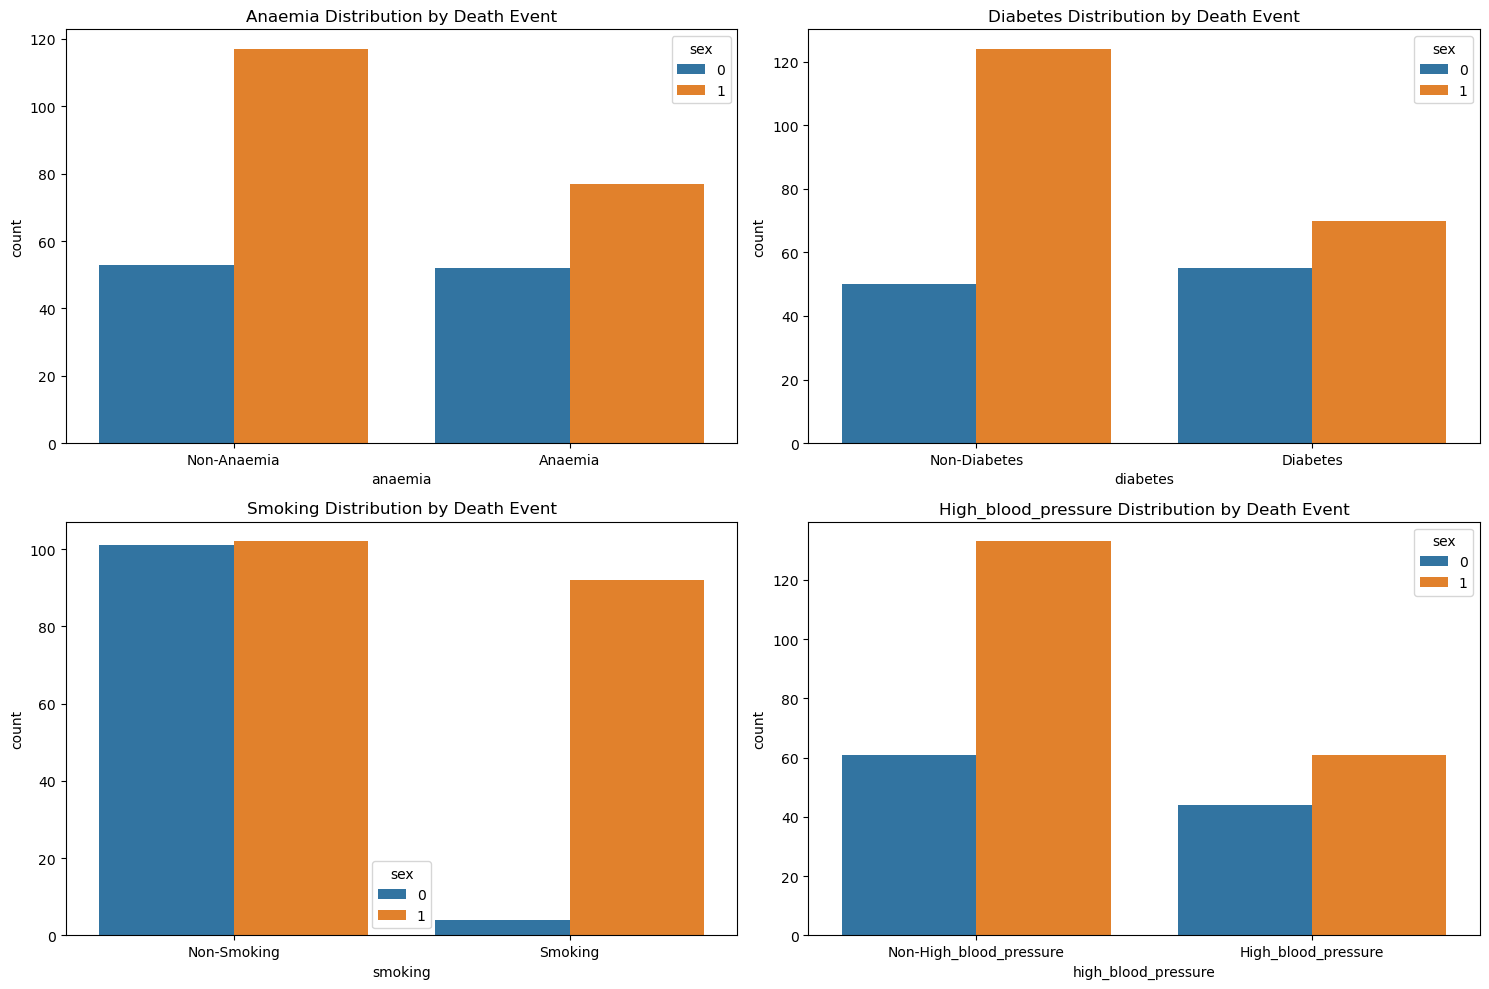

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical_vars = ['anaemia', 'diabetes', 'smoking', 'high_blood_pressure']

# Mappings for labels
label_map = {0: 'Non-', 1: ''}  # Prefix map for 'No' vs. regular label

# Set up the plot
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='sex', data=df)
    plt.title(f'{var.capitalize()} Distribution by Death Event')
    
    # Update x-axis labels based on 0/1 values
    plt.xticks([0, 1], [f'{label_map[val]}{var.capitalize()}' for val in [0, 1]])

plt.tight_layout()
plt.show()


# Hypothesis

<b>Relationship between death and smoking</b>

Null Hypothesis: 
$$
H_0: \rho = 0
$$
Alternate Hypothesis:
$$
H_1: \rho \neq 0
$$

In [63]:
from scipy.stats import pearsonr
corr_coef, p_val = pearsonr(df['smoking'], df['DEATH_EVENT'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', p_val)

the Pear correlation coefficient: -0.012623152709359636
the pvalue: 0.82792071280924


By the results, we do not reject the null hypothesis since the pvalue = 0.828 > 0.05, therefore is no correlation between death and smoking. This makes sense because by the dataset we are given, it is based on heart diseases which smoking does not highly affect heart failure. 



<b>Relationship between death and high blood pressure </b>

Null Hypothesis: 
$$
H_0: \rho = 0
$$
Alternate Hypothesis:
$$
H_1: \rho \neq 0
$$

In [64]:
corr_coef, p_val = pearsonr(df['high_blood_pressure'], df['DEATH_EVENT'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', p_val)

the Pear correlation coefficient: 0.07935105769128536
the pvalue: 0.17114949852935257


In [121]:
from scipy import stats

death = df[df['DEATH_EVENT'] == 1]['ejection_fraction']
non_death = df[df['DEATH_EVENT'] == 0]['ejection_fraction']

# Perform a t-test
t_stat, p_val = stats.ttest_ind(death, non_death)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in ejection_fraction between death and non-death patients.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ejection_fraction between death and non-death patients.")


T-statistic: -4.806
P-value: 2.452897418208845e-06
Reject the null hypothesis: There is a significant difference in ejection_fraction between death and non-death patients.


In [122]:
from scipy import stats

diabetic = df[df['diabetes'] == 1]['age']
non_diabetic = df[df['diabetes'] == 0]['age']

# Perform a t-test
t_stat, p_val = stats.ttest_ind(diabetic, non_diabetic)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in age between diabetic and non-diabetic patients.")
else:
    print("Fail to reject the null hypothesis: No significant difference in age between diabetic and non-diabetic patients.")


T-statistic: -1.746
P-value: 0.082
Fail to reject the null hypothesis: No significant difference in age between diabetic and non-diabetic patients.


In [127]:
corr_coef, p_val = pearsonr(df['age'], df['high_blood_pressure'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', round(p_val,6))

the Pear correlation coefficient: 0.09334717088927227
the pvalue: 0.107206


In [124]:
corr_coef, p_val = pearsonr(df['sex'], df['high_blood_pressure'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', round(p_val,6))


female = df[df['sex'] == 1]['high_blood_pressure']
male = df[df['sex'] == 0]['high_blood_pressure']

# Perform a t-test
t_stat, p_val = stats.ttest_ind(female, male)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in age between high_blood_pressure and patients.")
else:
    print("Fail to reject the null hypothesis: No significant difference in age between high_blood_pressure and patients.")


the Pear correlation coefficient: -0.10461462935689742
the pvalue: 0.070865
T-statistic: -1.813
P-value: 0.071
Fail to reject the null hypothesis: No significant difference in age between high_blood_pressure and patients.


In [92]:
corr_coef, p_val = pearsonr(df['anaemia'], df['DEATH_EVENT'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', round(p_val,6))

the Pear correlation coefficient: 0.06627009846028781
the pvalue: 0.253299


Patients with anaemia are more likely to experience death in heart failure."

Reasoning: Anaemia can worsen the condition of heart failure by decreasing oxygen delivery, which may increase the risk of death.
However, in this test, we do not reject hypothesis, since the p value > 0.05

In [98]:
survived = df[df['DEATH_EVENT'] == 0]['age']
died = df[df['DEATH_EVENT'] == 1]['age']

# Perform a t-test to compare the means
t_stat, p_val = stats.ttest_ind(survived, died)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in age between survivors and those who died.")
else:
    print("Fail to reject the null hypothesis: No significant difference in age between survivors and those who died.")


T-statistic: -4.522
P-value: 8.86297502252399e-06
Reject the null hypothesis: There is a significant difference in age between survivors and those who died.


Age is positively correlated with the likelihood of death in heart failure patients. Reject the null hypothesis.Reasoning: Older age may be a risk factor in heart failure, with an increased likelihood of death as age increases.

In [125]:
corr_coef, p_val = pearsonr(df['creatinine_phosphokinase'], df['DEATH_EVENT'])
print(f'the Pear correlation coefficient:', corr_coef)
print(f'the pvalue:', round(p_val,6))


survived = df[df['DEATH_EVENT'] == 0]['creatinine_phosphokinase']
died = df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase']

# Perform a t-test to compare the means
t_stat, p_val = stats.ttest_ind(survived, died)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in creatinine_phosphokinase between survivors and those who died.")
else:
    print("Fail to reject the null hypothesis: No significant difference in creatinine_phosphokinase between survivors and those who died.")


the Pear correlation coefficient: 0.06272816025237474
the pvalue: 0.279611
T-statistic: -1.083
P-value: 0.27961124573614
Fail to reject the null hypothesis: No significant difference in creatinine_phosphokinase between survivors and those who died.


Methodology

Cleaning Data:
The structure of the dataset was checked using the shape function.
The age column was converted to whole numbers using the round() function and astype() method.
isnull() was used to check for null or missing entries in each column.
describe() provided a quick overview of key statistics in the data, which made it easier to analyze and identify patterns or issues, especially in providing probabilities for binary variables.
Exploratory Data Analysis (EDA):
The corr() function was first used to generate the correlation matrix to understand the relationships between variables.

Univariate analysis began with plotting histograms for continuous variables using sns.histplot. This helped in understanding the frequency distribution of the data, revealing:

Whether the data is normally distributed or skewed.
The presence of any outliers.
The spread of values within the variables.
For the violin plot:

plt.subplots(2, 2, figsize=(15, 10)) created a 2x2 grid of subplots and set the figure size.
sns.histplot was used to create histograms for each variable.
tight_layout() automatically adjusted subplot parameters to ensure proper spacing between plots and avoid label and title overlap.
plt.show() displayed the figure with all histograms.
Correlation Matrix Plot: The code used sns.pairplot to visualize relationships between numeric variables (age, ejection_fraction, serum_creatinine, serum_sodium, time) and their relationship to DEATH_EVENT. This pairplot showed scatterplots for each pair of variables and histograms for individual variables, color-coded by DEATH_EVENT. This visualization helped identify correlations, distributions, and patterns, particularly how variables differed between those who survived and those who did not. plt.show() displayed the plot.

Barplot: sns.countplot was used to visualize the distribution of categorical variables (anaemia, diabetes, smoking, high_blood_pressure) in relation to DEATH_EVENT. Separate plots were created for each variable to show how the categories were distributed between survivors (0) and non-survivors (1). The plots were arranged in a 2x2 grid with plt.tight_layout() ensuring proper spacing. This visualization helped in understanding the relationship between each condition and the death outcome.

Under the Hypothesis:
The Pearson's r test was not used because it measures the strength of the relationship between two continuous variables. Since one of the variables (DEATH_EVENT) is binary, Pearson’s r was not appropriate.
The t-test was used instead to compare the mean of the continuous variable (like age) between two groups (survived vs died).
The t-test works by checking if the difference between the averages of two groups (e.g., age for survivors vs non-survivors) is statistically significant, helping to determine whether the observed difference is due to chance.
Therefore, the t-test was the correct choice to compare the mean of a continuous variable (age) between two groups, in contrast to Pearson's r, which is suitable when both variables are continuous.


